<a href="https://colab.research.google.com/github/pythonwithzeeshan/learn-lessons/blob/Machine_Learning_Project/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Age Classification**

**Libraries**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

**Define Dataset**

In [2]:
X = np.array([[2],[5],[8],[12],[15],[18],[20],[25],[30],[35],[40],[45],[50],[60],[70]], dtype=np.float32)

In [3]:
y = np.array([[0],[0],[0],[0],[1],[1],[2],[2],[2],[2],[2],[2],[2],[2],[2]], dtype=np.float32)

**Convert numpay into Tensor**

In [4]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

**Visualize Actual data**

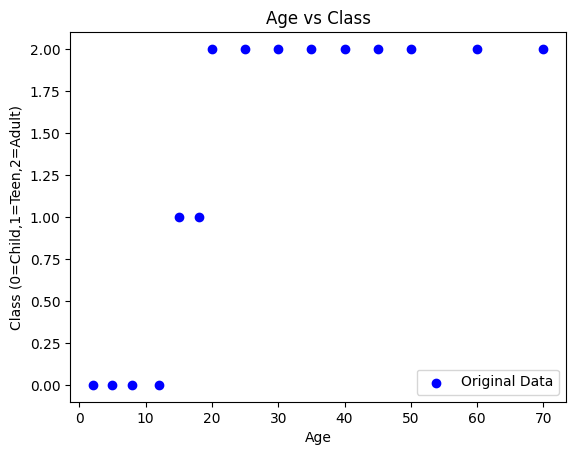

In [5]:
plt.scatter(X_tensor, y_tensor, color='blue', label='Original Data')
plt.xlabel("Age")
plt.ylabel("Class (0=Child,1=Teen,2=Adult)")
plt.title("Age vs Class")
plt.legend()
plt.show()

**Define Neural Network**

In [6]:
class AgeClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

**Create Objects**

In [7]:
models = AgeClassifier()
models

AgeClassifier(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)

**Define Loss**

In [8]:
criterion = nn.CrossEntropyLoss()

**Optimizer**

In [9]:
optimizer = optim.Adam(models.parameters(), lr=0.01)

**Working on Training Loop**

In [10]:
epochs = 500

**Loops**

In [11]:
y_tensor = y_tensor.view(-1).long()

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = models(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == y_tensor).sum().item() / y_tensor.size(0) * 100
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.2f}%")


Epoch 100/1000, Loss: 0.2563, Accuracy: 93.33%
Epoch 200/1000, Loss: 0.1388, Accuracy: 100.00%
Epoch 300/1000, Loss: 0.0964, Accuracy: 100.00%
Epoch 400/1000, Loss: 0.0710, Accuracy: 100.00%
Epoch 500/1000, Loss: 0.0529, Accuracy: 100.00%
Epoch 600/1000, Loss: 0.0394, Accuracy: 100.00%
Epoch 700/1000, Loss: 0.0293, Accuracy: 100.00%
Epoch 800/1000, Loss: 0.0220, Accuracy: 100.00%
Epoch 900/1000, Loss: 0.0167, Accuracy: 100.00%
Epoch 1000/1000, Loss: 0.0129, Accuracy: 100.00%


**Predictions after training**

In [12]:
with torch.no_grad():
    outputs = models(X_tensor)
    _, predicted = torch.max(outputs, 1)
print("\nPredictions on original data:")
for age, pred in zip(X_tensor, predicted):
    label = "Child" if pred==0 else "Teen" if pred==1 else "Adult"
    print(f"Age {int(age.item())} -> {label}")


Predictions on original data:
Age 2 -> Child
Age 5 -> Child
Age 8 -> Child
Age 12 -> Child
Age 15 -> Teen
Age 18 -> Teen
Age 20 -> Adult
Age 25 -> Adult
Age 30 -> Adult
Age 35 -> Adult
Age 40 -> Adult
Age 45 -> Adult
Age 50 -> Adult
Age 60 -> Adult
Age 70 -> Adult


**Visualize predictions**

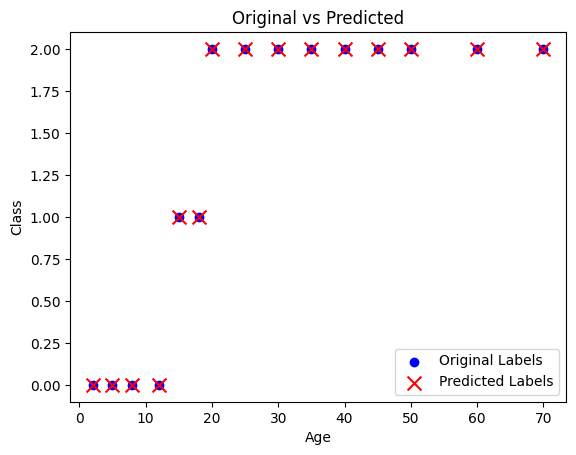

In [13]:
plt.scatter(X,y, color='blue', label='Original Labels')
plt.scatter(X, predicted.numpy(), color='red', marker='x', s=100, label='Predicted Labels')
plt.xlabel("Age")
plt.ylabel("Class")
plt.title("Original vs Predicted")
plt.legend()
plt.show()

**Test With New Data point**

In [14]:
new_ages = [1, 13, 17, 23, 37, 65]
new_tensor = torch.tensor([[a] for a in new_ages], dtype=torch.float32)

with torch.no_grad():
    outputs_new = models(new_tensor)
    _, predicted_new = torch.max(outputs_new, 1)

print("\nPredictions on new ages:")
for age, pred in zip(new_ages, predicted_new):
    label = "Child" if pred==0 else "Teen" if pred==1 else "Adult"
    print(f"Age {age} -> {label}")


Predictions on new ages:
Age 1 -> Child
Age 13 -> Child
Age 17 -> Teen
Age 23 -> Adult
Age 37 -> Adult
Age 65 -> Adult


**Visualize new data predictions**

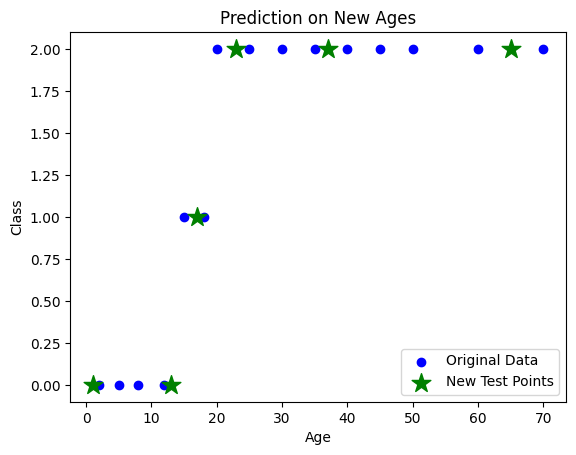

In [15]:
plt.scatter(X, y, color='blue', label='Original Data')
plt.scatter(new_tensor.numpy(), predicted_new.numpy(), color='green', marker='*', s=200, label='New Test Points')
plt.xlabel("Age")
plt.ylabel("Class")
plt.title("Prediction on New Ages")
plt.legend()
plt.show()

**Evaulate with new data point**

In [16]:
with torch.no_grad():
    outputs_train = models(X_tensor)
    _, predicted_train = torch.max(outputs_train, 1)

# Accuracy on training data
train_acc = (predicted_train == y_tensor.view(-1).long()).sum().item() / y_tensor.size(0) * 100
print(f"Training Accuracy: {train_acc:.2f}%")

Training Accuracy: 100.00%


**Save Model**

In [17]:
torch.save(models.state_dict(), "age_classifier_model.pth")
print("\nModel saved as age_classifier_model.pth")


Model saved as age_classifier_model.pth


**Final Visualization**

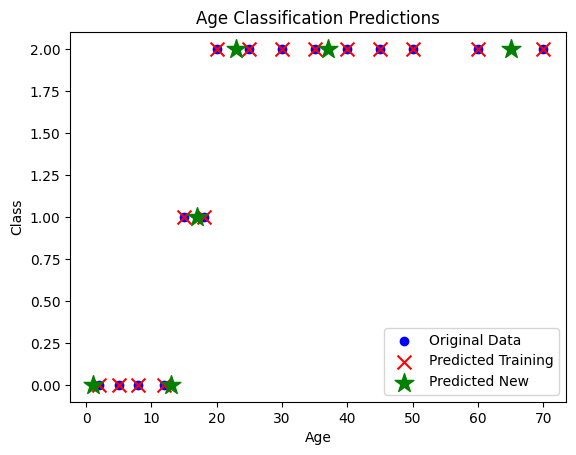

In [18]:
plt.scatter(X_tensor.numpy(), y_tensor.numpy(), color='blue', label='Original Data')
plt.scatter(X_tensor.numpy(), predicted_train.numpy(), color='red', marker='x', s=100, label='Predicted Training')
plt.scatter(new_tensor.numpy(), predicted_new.numpy(), color='green', marker='*', s=200, label='Predicted New')
plt.xlabel("Age")
plt.ylabel("Class")
plt.title("Age Classification Predictions")
plt.legend()
plt.show()